In [94]:
##Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
## Loading  Data
df_train=pd.read_csv('Kmean.csv')
arr_train=df_train.to_numpy()
print(f"data_train.shape: {arr_train.shape}")
df_train.describe()

data_train.shape: (178, 13)


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [96]:
## Forming Input and Output labels of training set
x_train=arr_train
print(x_train.shape)
print(x_train)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [97]:
## Z-score Normalisation of data
def feature_scale_zNormal(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_normal=(x-mean)/std
    return x_normal
x_train= feature_scale_zNormal(x_train)   

In [98]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        dist=[]
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            dist.append(norm_ij)
        idx[i] = np.argmin(dist) 
    return idx    

In [99]:
def compute_centroid_means(X, idx, K):
    m, n = X.shape
    centroids=np.zeros((K,n))
    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis = 0)
    return centroids    

In [100]:
def kMeans(X, initial_centroids,iterations):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(iterations):
        idx = find_closest_centroids(X, centroids)
        previous_centroids = centroids
        centroids = compute_centroid_means(X, idx, K)
    return centroids, idx 

In [101]:
def calculate_inertia(X, centroids, labels):
    distances = np.linalg.norm(X - centroids[labels], axis=1)
    return np.sum(distances ** 2)

In [102]:
def draw_elbow_curve(data, max_clusters=10):
    k_values = range(1, max_clusters + 1)
    inertia_values = []

    for k in k_values:
        init_centroids = kMeans_init_centroids(data, k)
        centroids, labels = kMeans(data, init_centroids, iterations=1000)
        inertia_values.append(calculate_inertia(data, centroids, labels))

    plt.plot(k_values, inertia_values, marker='o')
    plt.title('Elbow Curve for K-Means Clustering')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Cost')
    plt.show()

In [103]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [104]:
init_centroids = kMeans_init_centroids(x_train,3)
centroids, idx = kMeans(x_train, init_centroids,1000)
print(idx)
for i in range(len(idx)):
    cost += np.sum((x_train[i] - centroids[idx[i]]) ** 2)
cost /= 178
print(cost)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 0 2 2 2 0
 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
7.231525648531066


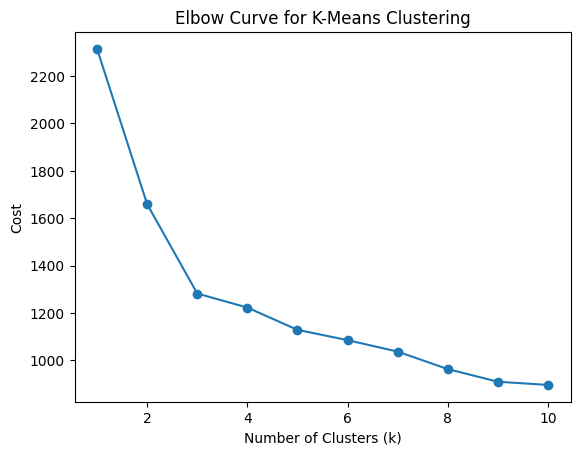

In [105]:
draw_elbow_curve(x_train, max_clusters=10)